In [4]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline 

Text(0, 0.5, 'Y dataset')

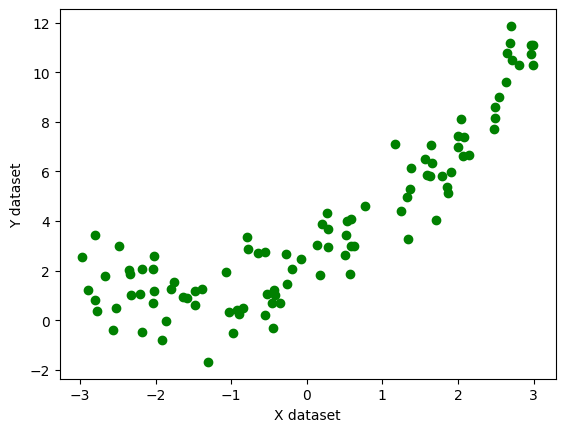

In [5]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X, y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
regression_1=LinearRegression()
regression_1.fit(X_train,y_train)
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.6229403594828674


Text(0, 0.5, 'Y')

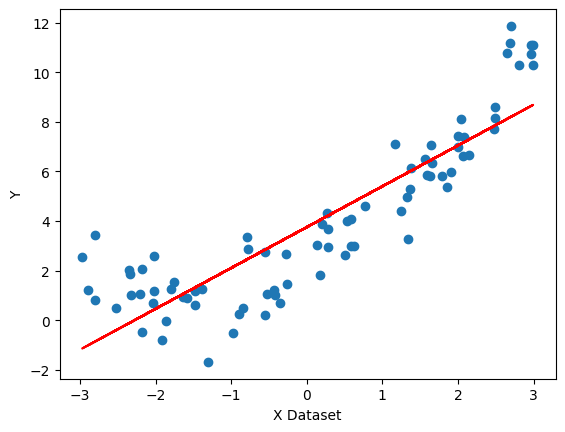

In [7]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

## Polynomial Regression

In [ ]:
#apply polynomial transformation
poly=PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [11]:
X_train_poly
#it displays :[bias, x, x^2]

array([[ 1.        , -2.51864764,  6.34358594],
       [ 1.        , -0.88947236,  0.79116108],
       [ 1.        , -0.77981174,  0.60810636],
       [ 1.        ,  2.96145358,  8.7702073 ],
       [ 1.        ,  2.04581112,  4.18534314],
       [ 1.        ,  0.13841107,  0.01915762],
       [ 1.        , -0.4216689 ,  0.17780466],
       [ 1.        ,  2.99420003,  8.9652338 ],
       [ 1.        ,  1.25164178,  1.56660715],
       [ 1.        ,  0.76582433,  0.5864869 ],
       [ 1.        ,  2.493186  ,  6.21597645],
       [ 1.        , -1.79712254,  3.22964941],
       [ 1.        , -2.03555608,  4.14348856],
       [ 1.        , -0.34772001,  0.12090921],
       [ 1.        ,  2.47357192,  6.11855805],
       [ 1.        ,  1.9968451 ,  3.98739035],
       [ 1.        ,  0.51193877,  0.26208131],
       [ 1.        ,  1.65067371,  2.72472371],
       [ 1.        ,  0.19917845,  0.03967205],
       [ 1.        , -0.84916236,  0.72107671],
       [ 1.        ,  1.56156042,  2.438

In [12]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8619546018411622


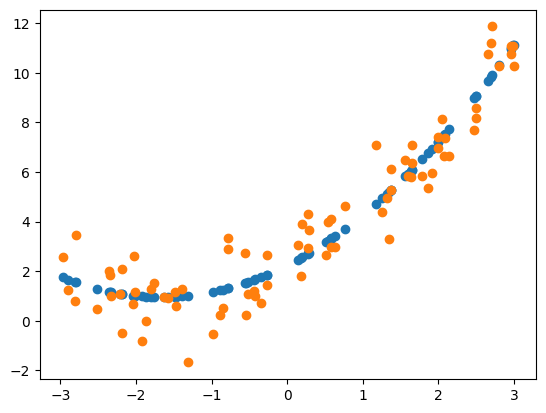

In [13]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [14]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [ ]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8553915601275365


In [16]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

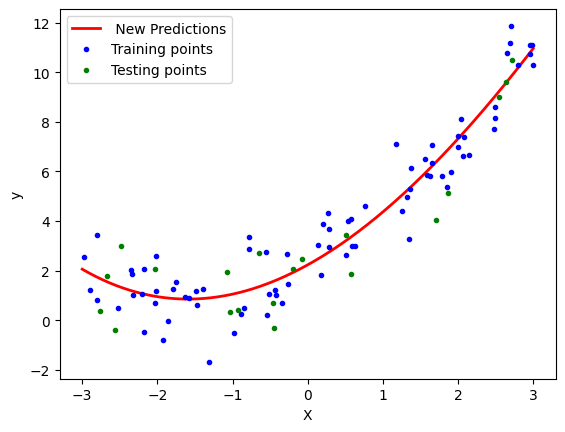

In [17]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts 

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

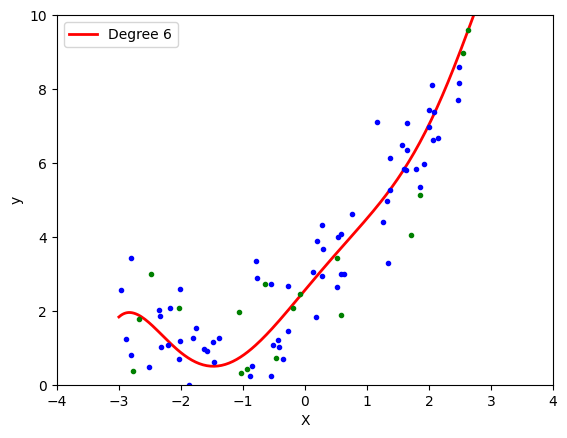

In [22]:
poly_regression(6)